# [HW12] FBA QUANT - ASSET PRICING

Kim Na Young (dudskrla09@gmail.com)

---

# Assignment 1: Summarize this week's study 

### Chapter 6. Capital Allocation to Risky Assets
**6.1 Risk and Risk Aversion**     
$$ U = E(r) - \frac{1}{2} A \sigma ^ 2$$
Higher utility values are assigned to portfolios with more attractive risk-return profiles.
Portfolios receive higher utility scores for higher expected returns and lower scores for higher volatility.

**6.2 Capital Allocation across Risky and Risk-Free Portfolios**       
The risk-return trade-off available to investors by examining the most basic asset allocation choice: how much of the portfolio should be placed in risk-free money market securities (F) versus other risky asset classes (P). 

**6.3 The Risk-Free Asset**     
Treasury bills as the risk-free asset. 
We treat money market funds (MMF) as the most easily accessible risk-free asset for most investors.

**6.4 Portfolios of One Risky Asset and a Risk-Free Asset**    
- The rate of return on the complete portfolio 
$$ r_C = yr_P + (1-y)r_f$$

- The standard deivation of the complete portfolio
$$ \sigma_C = y\sigma_P $$

- The expectation of this portfolio's rate of return
$$ E(r_C) = yE(r_P) + (1-y)r_f = r_f + y[E(r_P) - r_f] = r_f + \frac{\sigma_C}{\sigma_P}[E(r_P) - r_f] $$ 

- Sharpe ratio
$$ S = \frac{E(r_P) - r_f}{\sigma_P} $$ 

- Capital Allocation Line (CAL)
$$ CAL = r_f + \frac{\sigma_C}{\sigma_P}[E(r_P) - r_f] $$ 


**6.5 Risk Tolerance and Asset Allocation**


- The optimal position for risk-averse investors in the risky asset (y*)
$$ y^* = \frac{E(r_P) - r_f}{A\sigma^2_P} $$

**6.6 Passive Strategies: The Capital Market Line**   
We call the capital allocation line provided by 1-month T-bills and a broad index of common stocks the capital market line (CML). A passive strategy generates an investment opportunity set that is represented by the CML.

### Chapter 7. Optimal Risky Portfolios
**7.1 Diversification and Portfolio Risk**
- Market risk (= systematic risk, nondiversifiable risk)     
The risk that remains even after extensive diversification 

- Unique risk (= firm-specific risk, diversifiable risk)    
The risk that can be eliminated by diversification

**7.2 Portfolios of Two Risky Assets**    
- The rate of return on this portfolio 
$$ r_P = w_Dr_D + w_Er_E $$ 

- The expected return on the portfolio
$$ E(r_P) = w_DE(r_D) + w_DE(r_E) $$

- The variance of the two-asset portfolio
$$ \sigma_P^2 = w^2_D\sigma^2_D + w^2_E\sigma^2_E + 2w_Dw_ECov(r_D, r_E) = w_Dw_DCov(r_D, r_D) + w_Ew_ECov(r_E, r_E) + 2w_Dw_ECov(r_D, r_E) \\ = w^2_D\sigma^2_D + w^2_E\sigma^2_E + 2w_Dw_E\sigma_D\sigma_Eρ_{DE}$$

- The portfolio weights of the minimum-variance 
$$ w_{min}(D) = \frac{\sigma^2_E - Cov(r_D, r_E)}{\sigma^2_D + \sigma^2_E - 2Cov(r_D, r_E)} $$

**7.3 Asset Allotion with Stocks, Bonds, and Bills**

- The portfolio weights of the maximum-Sharpe ratio
$$ w_D = \frac{E(R_D)\sigma^2_E - E(R_E)Cov(R_D, R_E)}{E(R_D)\sigma^2_E + E(R_E)\sigma^2_D - [E(R_D) + E(R_E)] Cov(R_D, R_E)} $$

**7.4 The Markowitz Portfolio Optimization Model**   
(1) We identify the risk-return combinations available from the set of risky assets         
(2) We identify the optimal portfolio of risky assets by finding the portfolio weights that result in the steepest CAL       
(3) We choose an appropriate complete portfolio by mixing the risk-free asset with the optimal risky portfolio 



---

# Assignment 2: Replicate the code in the lab session of Week 2. Introduction to Portfolio 

### Section 1. Introduction to Optimization and The Efficient Frontier

***1) Efficient frontier-Part 1***

In [15]:
# 데이터 : ind30_m_vw_rets.csv
# 칼럼 31개 = 1개 (날짜) + 30개 (업종)

import pandas as pd

ind = pd.read_csv("data/ind30_m_vw_rets.csv", 
                  header=0,     # header 가 0 번째 행에 위치
                  index_col=0,  # index 가 0 번째 열에 위치
                  parse_dates=True) / 100 # 수익률을 % 로 표시 

# ind.index 의 type 변환 : Int64Index -> PeriodIndex
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

# column 의 공백 제거
ind.columns = ind.columns.str.strip()

- https://github.com/WongYatChun/Introduction_to_Portfolio_Construction_and_Analysis_with_Python/blob/master/edhec_risk_kit.py


In [16]:
import edhec_risk_kit as erk

ind = erk.get_ind_returns()

<AxesSubplot:>

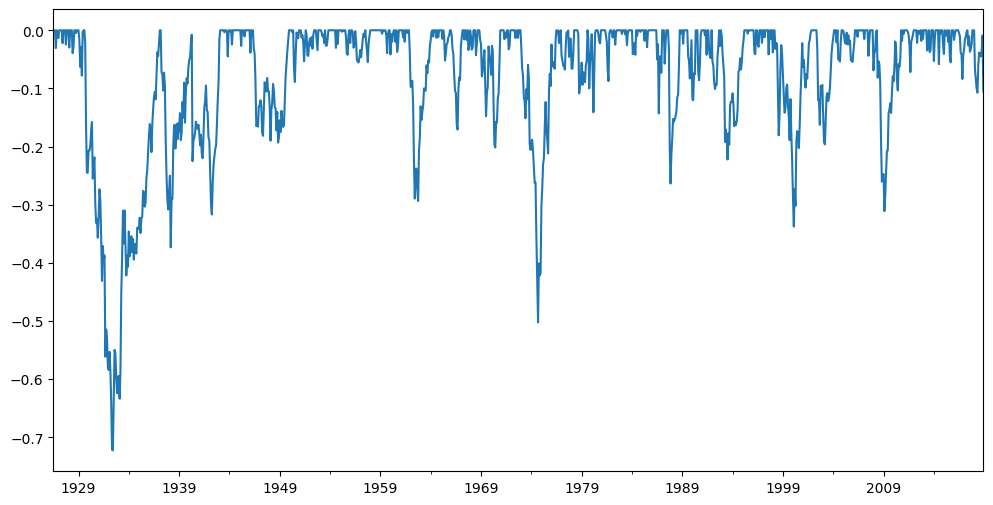

In [17]:
erk.drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12, 6))

In [18]:
cols_of_interest = ["Food", "Beer", "Smoke"]
erk.var_gaussian(ind[cols_of_interest], modified=True)

Food     0.061207
Beer     0.033881
Smoke    0.080292
dtype: float64

<AxesSubplot:>

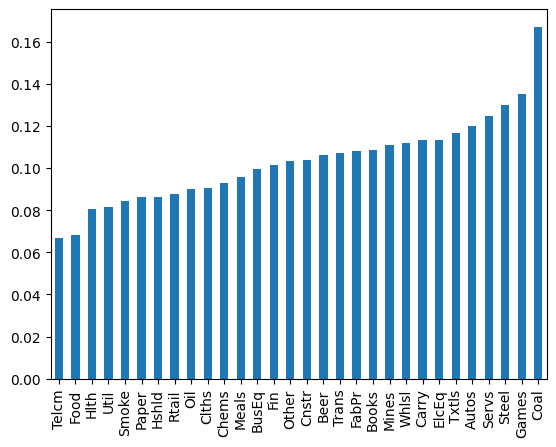

In [19]:
erk.var_gaussian(ind).sort_values().plot.bar()
# 위험이 가장 낮은 것 : head() 로 확인
# 위험이 가장 높은 것 : tail() 로 확인 

<AxesSubplot:title={'center':'Industry Sharpe Ratios 1926-2018'}>

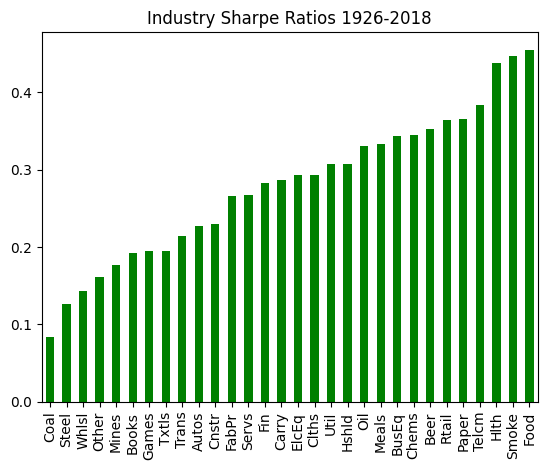

In [20]:
# 통계량 확인 (Sharpe ratio)
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018", color="green")

<AxesSubplot:title={'center':'Industry Sharpe Ratios 2000-2018'}>

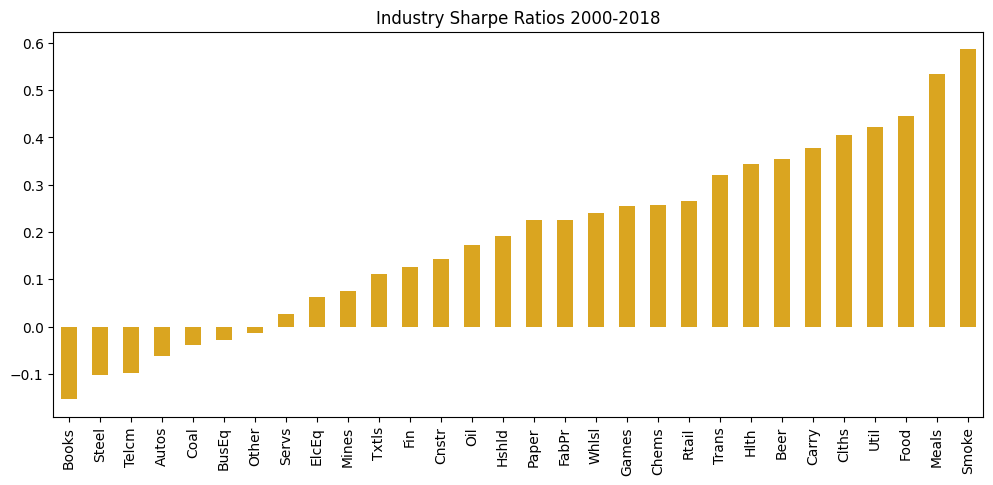

In [21]:
erk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title='Industry Sharpe Ratios 2000-2018', figsize=(12, 5), color="goldenrod")

Generating the efficient frontier requires a set of expected returns and a covariance matrix.

<AxesSubplot:>

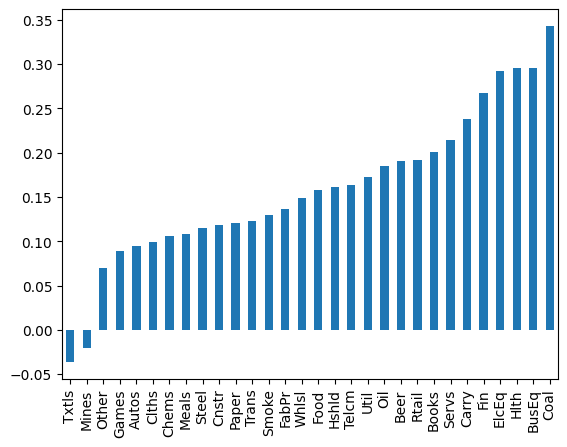

In [22]:
# (1) expected returns
er = erk.annualize_rets(ind["1995":"2000"], 12)
er.sort_values().plot.bar()

In [23]:
# (2) a covariance matrix
cov = ind["1995":"2000"].cov()
cov.shape

(30, 30)

In [24]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


***2) Asset Efficient Frontier-Part 2***

In [25]:
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [26]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [27]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [28]:
import pandas as pd
import numpy as np

ew = np.repeat(1/4, 4)
erk.portfolio_return(ew, er[l])

0.19511097196038385

In [29]:
erk.portfolio_vol(ew, cov.loc[l,l])

0.055059195776437045

<AxesSubplot:xlabel='V', ylabel='R'>

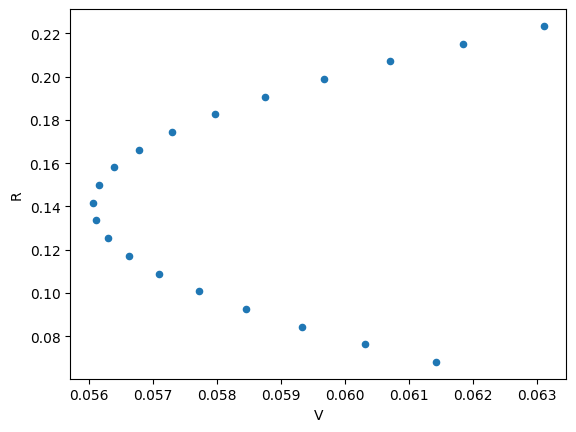

In [30]:
l = ["Games", "Fin"]
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "V": vols})
ef.plot.scatter(x="V", y="R")

<AxesSubplot:xlabel='Volatility'>

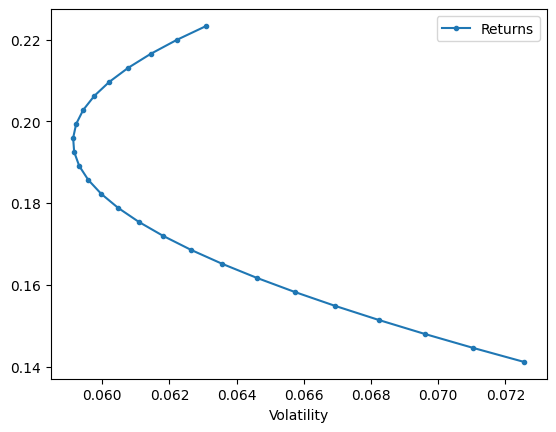

In [31]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l].values, cov.loc[l,l])

***3) Applying Quadprog to Draw the Efficient Frontier***

In [32]:
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

<AxesSubplot:xlabel='Volatility'>

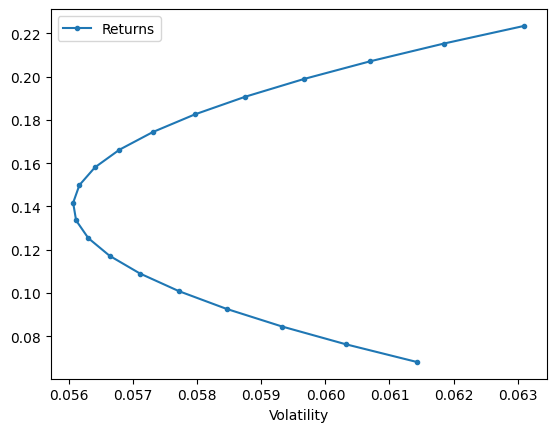

In [33]:
l = ["Games", "Fin"]
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [34]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [35]:
w15

array([0.47287631, 0.52712369])

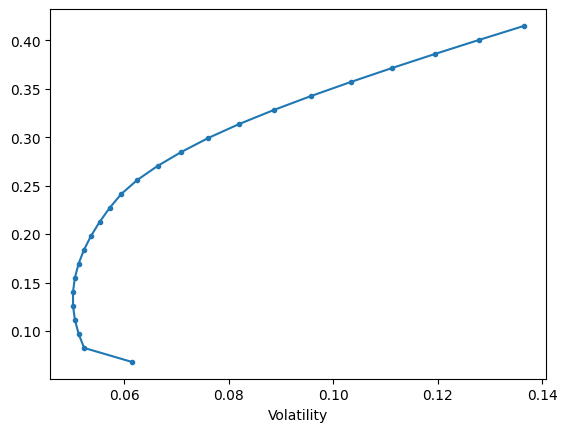

In [36]:
l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(25, er[l], cov.loc[l,l])

### Section 2. Implementing Markowitz

***1) Locating the Max Sharpe Ratio Portfolio***

In [37]:
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

(0.0, 0.14178366279799037)

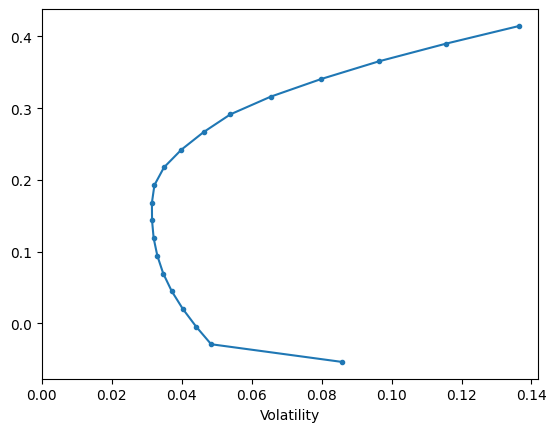

In [38]:
ax = erk.plot_ef_(20, er, cov)
ax.set_xlim(left = 0)

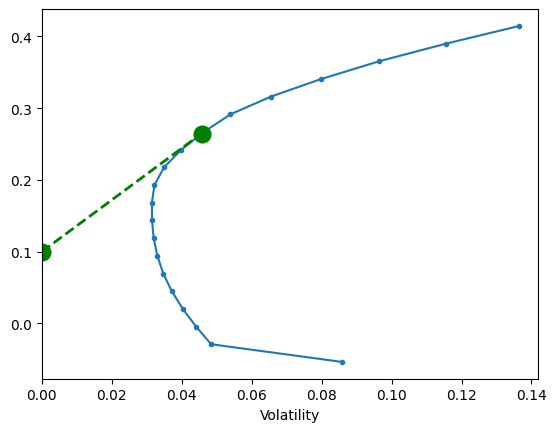

In [39]:
# plot EF
ax = erk.plot_ef_(20, er, cov)
ax.set_xlim(left = 0)
# get MSR
rf = 0.1
w_msr = erk.msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
# add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

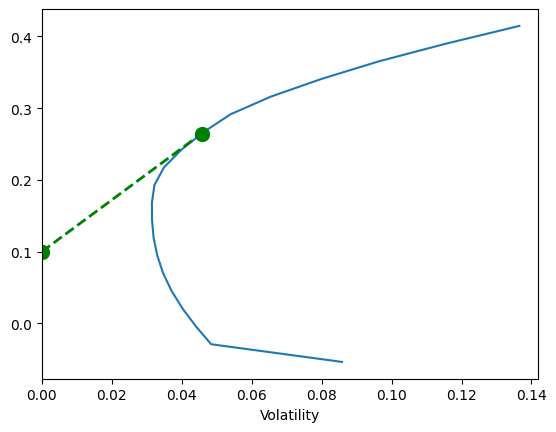

In [40]:
erk.plot_ef(20, er, cov, style='-', show_cml=True, riskfree_rate=0.1)

***2) Plotting EW and GMV on the Efficient Frontier***

In [41]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [42]:
l = ["Food", "Steel"]
erk.msr(0.1, np.array(er[l]), cov.loc[l,l])

array([0.75040362, 0.24959638])

In [43]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [44]:
erk.msr(0.1, np.array([.11, .12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

In [45]:
erk.msr(0.1, np.array([.10, .13]), cov.loc[l,l])

array([0., 1.])

In [46]:
erk.msr(0.1, np.array([.13, .10]), cov.loc[l,l])

array([1., 0.])

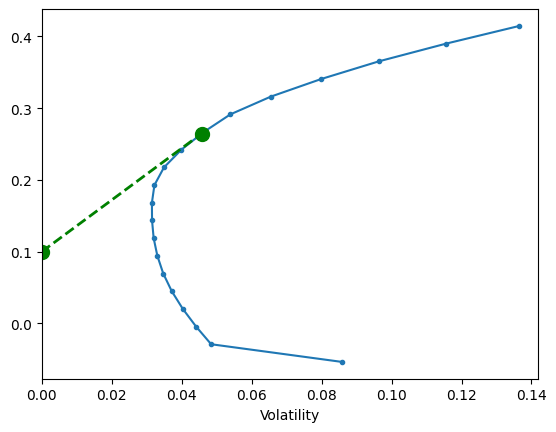

In [47]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

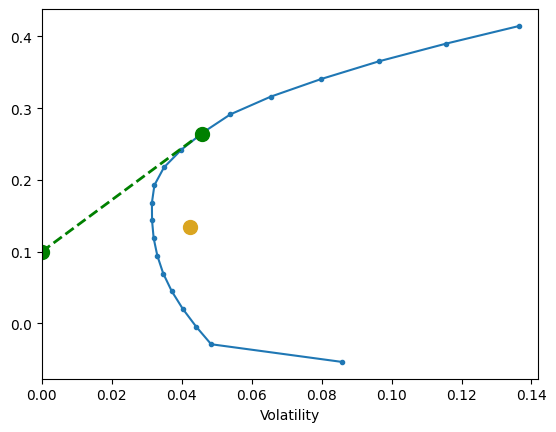

In [48]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

<AxesSubplot:xlabel='Volatility'>

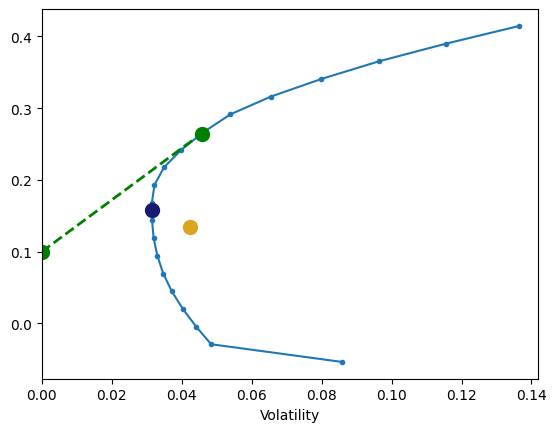

In [49]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

---

# Assignment 3: Solve the following problems

### Problem 1. 
A pension fund manager analyzes the relationship between a specific asset and the market. First, he wants to show that the monthly returns of the biggest company are highly correlated with monthly market returns. (Let a risk-free rate be the interest rate of a Treasury bill with a 3-month maturity. You can download the data on FRED: https://fred.stlouisfed.org/series/TB3MS)

a. Download the monthly excess returns(monthly return – risk-free rate) of Apple Inc. and S&P 500 from Jan 01, 2013, to Jan 01, 2023, using the yfinance library in python. And then, draw the scatter plot with Apple's monthly returns as dependent variables (y-axis) and the S&P 500 monthly returns as independent variables(x-axis). 

b. Calculate the simple linear regression coefficient (alpha, beta) using the above data
$$ r_{apple}-r_f=α+β(r_{snp500}-r_f )+ϵ $$

c. Test hypothesis $ H_0:β=0,H_1:β>0 $ for gradient $ β $ at a significance level of 5%.


In [50]:
import pandas as pd

risk_free_rate = pd.read_csv("TB3MS.csv", 
                    header=0,     # header 가 0 번째 행에 위치
                    index_col=0)  # index 가 0 번째 열에 위치

a. Download the monthly excess returns(monthly return – risk-free rate) of Apple Inc. and S&P 500 from Jan 01, 2013, to Jan 01, 2023, using the yfinance library in python. And then, draw the scatter plot with Apple's monthly returns as dependent variables (y-axis) and the S&P 500 monthly returns as independent variables(x-axis). 

(1) Download the monthly excess returns (monthly return – risk-free rate) of Apple Inc. and S&P 500 from Jan 01, 2013, to Jan 01, 2023, using the yfinance library in python.         

In [51]:
# 참고 : https://invest-in-yourself.tistory.com/296

- the monthly excess returns(monthly return – risk-free rate) of Apple Inc

Q. 월별 수익률은 Date를 어떻게 정해야? 

In [52]:
import numpy as np
import pandas as pd
import yfinance as yf

# (0) yahoo finance로부터 필요한 데이터 다운로드
# Download price data from Yahoo finance (가격 데이터 다운로드)
df_apple = yf.download('AAPL',
                        start = '2012-11-30',   # Q. 2013-01-01 은 공휴일인데, 2012-12-31 로 시작해야 하는지?
                        end = '2023-01-04')     # Q. 2023-01-01 은 공휴일인데, 2023-01-04 로 끝나야 하는지? 처리 방법?
# Merge the tow tables above (표 병합)
df_apple = df_apple[['Adj Close']]

# (1) Yahoo finance에서 받은 자료는 거래소가 휴일이거나 공휴일의 가격은 없기 때문에 모든 날짜가 포함되어 있는 것이 아닙니다. 
# 먼저 없는 날짜를 다시 만들어 주기 위해서 날짜 변수를 다음 코드로 만들어 주겠습니다. 
# 위에서 알 수 있듯이 가격 dataframe의 index가 날짜로 되어 있기 때문에 reset_index() 매서드를 통해서 변수로 만들어 주겠습니다.
df_apple = df_apple.reset_index()

# (2) 이제 원래 가격 데이터에 없는 날짜를 만들어 주겠습니다. 
# 데이터 상의 가장 처음 날짜를 start_date 변수로, 마지막 날짜를 end_date 변수로 만든 후에 pd.date_range() 함수를 이용하여 
# start_date부터 end_date까지 날짜를 만들어 줍니다. 
# .to_frame() 매서드로 dataframe으로 만들어 준 후 pd.merge() 함수를 이용해 가격 데이터와 합병해줍니다. 
# 이때 pd.merge() 안에 매개 변수로 들어가는 순서를 주의해 줘야 합니다. 날짜 데이터, 가격 데이터 순으로 넣어주어야 합니다.
# Get all days within the sample period (데이터에 없는 날짜 채우기)
start_date = df_apple['Date'].astype(str).iloc[0]
end_date = df_apple['Date'].astype(str).iloc[-1]
date_all = pd.date_range(start_date, end_date, freq='D').to_frame().rename(columns={0:'Date'}).reset_index(drop=True)
# Merge with price data (데이터 병합)
df_apple = pd.merge(date_all, df_apple, how='left')

# (3) 원래 데이터에 없는 1월 5일과 6일이 생긴 것을 볼 수 있습니다. 
# 이제 새로 생긴 NaN 변수에 가격 데이터를 채워줘야 합니다. 
# 직전 날짜의 가격 데이터를 넣어주면 되므로 다음과 같은 코드를 작성해 줍니다.
# the 'ffill' method propagates last valid observation forward (직전의 유효한 값으로 NaN 값 채우기)
df_apple = df_apple.fillna(method='ffill')

# (4) 월 수익률을 계산해 주기 위해서 월초 날짜 데이터를 만들어 주도록 하겠습니다. 
# Generate end of month data (월초 날짜 생성)
month_period = ["2012-12-01"]
month_period += ["20" + str(year) + "-" + str(month).zfill(2) + "-01" for year in range(13, 22+1) for month in range(1, 12+1)]
month_period += ["2023-01-01"]

# (5) .isin() 매서드를 이용하면 월말 날짜 데이터에 포함되어있는 날짜만 뽑아낼 수 있습니다.
# Get only start of month prices (월초 가격 데이터 생성)
df_apple_month = df_apple[df_apple['Date'].isin(month_period)]

# (6) 월 수익률을 계산해 줍니다.
# Date column을 index로 만들어 준 다음에 수익률을 계산해 주겠습니다.
# Monthly returns (월 수익률)
df_apple_month = df_apple_month.set_index('Date')
df_apple_month = df_apple_month.pct_change(1).dropna()
df_apple_month.rename(columns={"Adj Close":"Monthly Returns"}, inplace=True)

# (7) risk free rate
month_period = ["20" + str(year) + "-" + str(month).zfill(2) + "-01" for year in range(13, 22+1) for month in range(1, 12+1)]
month_period += ["2023-01-01"]
df_risk_free_rate = risk_free_rate.reset_index()
df_risk_free_rate_month = df_risk_free_rate[df_risk_free_rate['DATE'].isin(month_period)]
df_risk_free_rate_month = df_risk_free_rate_month.rename(columns={'DATE':'Date'}).set_index('Date')
df_risk_free_rate_month.index = pd.to_datetime(df_risk_free_rate_month.index) # dtype 을 datetime 으로 변경 

# (8) monthly excess returns
df_month = pd.merge(df_apple_month, df_risk_free_rate_month, how = "inner", on="Date")
df_month["Monthly Excess Returns"] = df_month['Monthly Returns'] - df_month['TB3MS']
df_month.head()

[*********************100%%**********************]  1 of 1 completed


,Monthly Returns,TB3MS,Monthly Excess Returns
Date,,,
2013-01-01,-0.090743,0.07,-0.160743
2013-02-01,-0.147603,0.10,-0.247603
2013-03-01,-0.045503,0.09,-0.135503
2013-04-01,-0.003624,0.06,-0.063624
2013-05-01,0.024201,0.04,-0.015799


- S&P 500

In [53]:
# (0) yahoo finance로부터 필요한 데이터 다운로드
df_snp500 = yf.download("^GSPC",
                    start = '2012-11-30',
                    end = '2023-01-04')['Adj Close']

# (1) Yahoo finance에서 받은 자료는 거래소가 휴일이거나 공휴일의 가격은 없기 때문에 모든 날짜가 포함되어 있는 것이 아닙니다. 
# 먼저 없는 날짜를 다시 만들어 주기 위해서 날짜 변수를 다음 코드로 만들어 주겠습니다. 
# 위에서 알 수 있듯이 가격 dataframe의 index가 날짜로 되어 있기 때문에 reset_index() 매서드를 통해서 변수로 만들어 주겠습니다.
df_snp500 = df_snp500.reset_index()

# (2) 이제 원래 가격 데이터에 없는 날짜를 만들어 주겠습니다. 
# 데이터 상의 가장 처음 날짜를 start_date 변수로, 마지막 날짜를 end_date 변수로 만든 후에 pd.date_range() 함수를 이용하여 
# start_date부터 end_date까지 날짜를 만들어 줍니다. 
# .to_frame() 매서드로 dataframe으로 만들어 준 후 pd.merge() 함수를 이용해 가격 데이터와 합병해줍니다. 
# 이때 pd.merge() 안에 매개 변수로 들어가는 순서를 주의해 줘야 합니다. 날짜 데이터, 가격 데이터 순으로 넣어주어야 합니다.
# Get all days within the sample period (데이터에 없는 날짜 채우기)
start_date = df_snp500['Date'].astype(str).iloc[0]
end_date = df_snp500['Date'].astype(str).iloc[-1]
date_all = pd.date_range(start_date, end_date, freq='D').to_frame().rename(columns={0:'Date'}).reset_index(drop=True)
# Merge with price data (데이터 병합)
df_snp500 = pd.merge(date_all, df_snp500, how='left')

# (3) 원래 데이터에 없는 1월 5일과 6일이 생긴 것을 볼 수 있습니다. 
# 이제 새로 생긴 NaN 변수에 가격 데이터를 채워줘야 합니다. 
# 직전 날짜의 가격 데이터를 넣어주면 되므로 다음과 같은 코드를 작성해 줍니다.
# the 'ffill' method propagates last valid observation forward (직전의 유효한 값으로 NaN 값 채우기)
df_snp500 = df_snp500.fillna(method='ffill')

# (4) 월 수익률을 계산해 주기 위해서 월초 날짜 데이터를 만들어 주도록 하겠습니다. 
# Generate end of month data (월초 날짜 생성)
month_period = ["2012-12-01"]
month_period += ["20" + str(year) + "-" + str(month).zfill(2) + "-01" for year in range(13, 22+1) for month in range(1, 12+1)]
month_period += ["2023-01-01"]

# (5) .isin() 매서드를 이용하면 월말 날짜 데이터에 포함되어있는 날짜만 뽑아낼 수 있습니다.
# Get only start of month prices (월초 가격 데이터 생성)
df_snp500_month = df_snp500[df_snp500['Date'].isin(month_period)]

# (6) 월 수익률을 계산해 줍니다.
# Date column을 index로 만들어 준 다음에 수익률을 계산해 주겠습니다.
# Monthly returns (월 수익률)
df_snp500_month = df_snp500_month.set_index('Date')
df_snp500_month = df_snp500_month.pct_change(1).dropna()
df_snp500_month.rename(columns={"Adj Close":"Monthly Returns"}, inplace=True)
df_snp500_month.head()

[*********************100%%**********************]  1 of 1 completed


,Monthly Returns
Date,
2013-01-01,0.007068
2013-02-01,0.060988
2013-03-01,0.003324
2013-04-01,0.028962
2013-05-01,0.013142


(2) And then, draw the scatter plot with Apple's monthly returns as dependent variables (y-axis) and the S&P 500 monthly returns as independent variables(x-axis). 

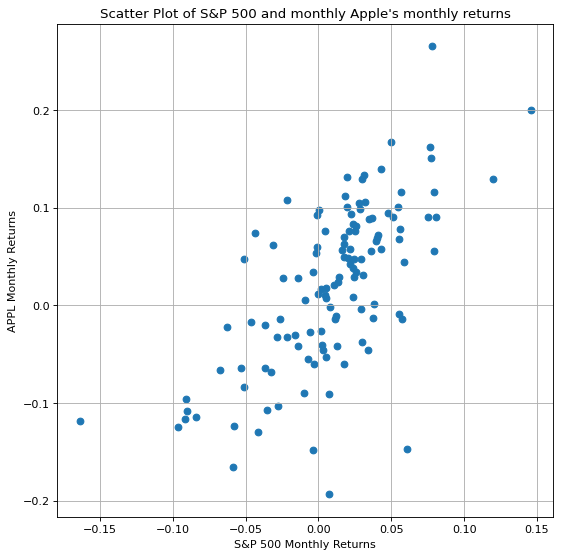

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(df_snp500_month, df_apple_month)
plt.xlabel('S&P 500 Monthly Returns')
plt.ylabel('APPL Monthly Returns')
plt.title('Scatter Plot of S&P 500 and monthly Apple\'s monthly returns', fontsize = 12)
plt.grid(True)

### Problem 2. 
A Student majoring in finance wants to form an efficient frontier of a portfolio of the top five companies in market capitalization within the S&P 500. 

a. Download the daily returns for the top five current market cap companies from Jan 1, 2018, to Jan 1, 2023.

b. Find the average annual return (average daily return * 252) and the annual covariance matrix (covariance matrix with daily return * 252)

c. Draw the following scatter plot of risk and returns using the Monte Carlo simulation. (trials: 20,000) 

d. Find the point with the largest sharp ratio and draw the CAL. The risk-free rate is assumed to be 2%. 
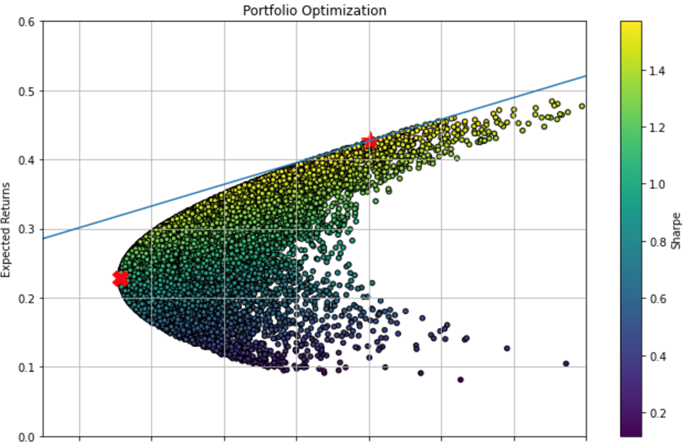



a. Download the daily returns for the top five current market cap companies from Jan 1, 2018, to Jan 1, 2023.

In [98]:
import numpy as np
import pandas as pd
import yfinance as yf

stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA']

daily_returns = pd.DataFrame()

for ticker in stocks:
    df_stock = yf.download(ticker,
                            start='2017-12-28',
                            end='2023-01-04')['Adj Close']
    df_stock = df_stock.reset_index()
    start_date = df_stock['Date'].astype(str).iloc[0]
    end_date = df_stock['Date'].astype(str).iloc[-1]
    date_all = pd.date_range(start_date, end_date, freq='D').to_frame().rename(columns={0:'Date'}).reset_index(drop=True)
    df_stock = pd.merge(date_all, df_stock, how='left')
    df_stock = df_stock.fillna(method='ffill')
    df_stock = df_stock.set_index('Date')
    df_stock = df_stock.pct_change(1).dropna()
    df_stock = df_stock.reset_index()
    df_stock = df_stock.loc[('2018-01-01' <= df_stock['Date']) & (df_stock['Date'] <= '2023-01-01')]
    df_stock = df_stock.rename(columns={'Adj Close':f'Returns of {ticker}'})
    daily_returns = pd.concat([daily_returns, df_stock[f'Returns of {ticker}']], axis=1)
daily_returns.index = df_stock['Date']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


b. Find the average annual return (average daily return * 252) and the annual covariance matrix (covariance matrix with daily return * 252)

In [99]:
annual_ret = daily_returns.mean() * 252
annual_cov = daily_returns.cov() * 252


c. Draw the following scatter plot of risk and returns using the Monte Carlo simulation. (trials: 20,000) 

In [100]:
from tqdm import tqdm

port_ret = []
port_risk = []
port_weights = []
port_sharpe_ratio = []

risk_free_rate = 0.02 # assumed 2%

for _ in tqdm(range(20000)):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    # temp portfolio returns, cov matrix
    temp_returns = np.dot(weights, annual_ret)
    temp_risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    temp_sharpe_ratio = (temp_returns - risk_free_rate) / temp_risk 
    
    port_ret.append(temp_returns)
    port_risk.append(temp_risk)
    port_weights.append(weights)
    port_sharpe_ratio.append(temp_sharpe_ratio)
    
portfolio = {"Returns": port_ret, "Risk": port_risk, "Sharpe Ratio": port_sharpe_ratio}

  0%|          | 0/20000 [00:00<?, ?it/s]

100%|██████████| 20000/20000 [00:00<00:00, 20318.59it/s]


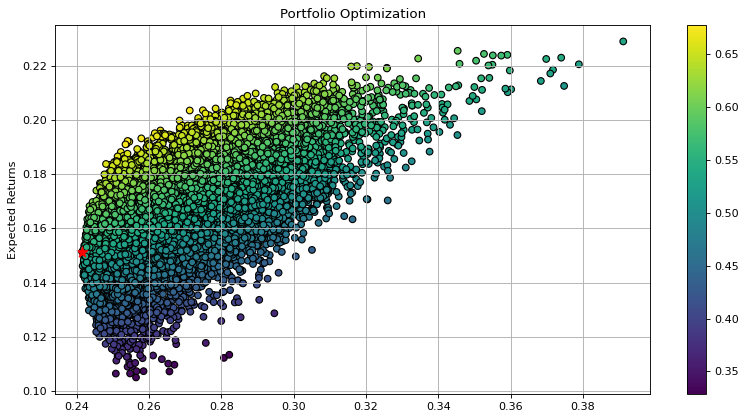

In [113]:
# 참고 : https://ktcf.tistory.com/58

import matplotlib.pyplot as plt

# scatter 
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(portfolio['Risk'], portfolio['Returns'], marker='o', edgecolors="black", c=portfolio['Sharpe Ratio'])
plt.ylabel('Expected Returns')
plt.title('Portfolio Optimization', fontsize = 12)
plt.colorbar()
plt.grid(True)

max_sharpe_idx = np.argmin(portfolio['Risk']) # minimum variance
plt.scatter(portfolio['Risk'][max_sharpe_idx], portfolio['Returns'][max_sharpe_idx], c='r', marker='*', s=100)

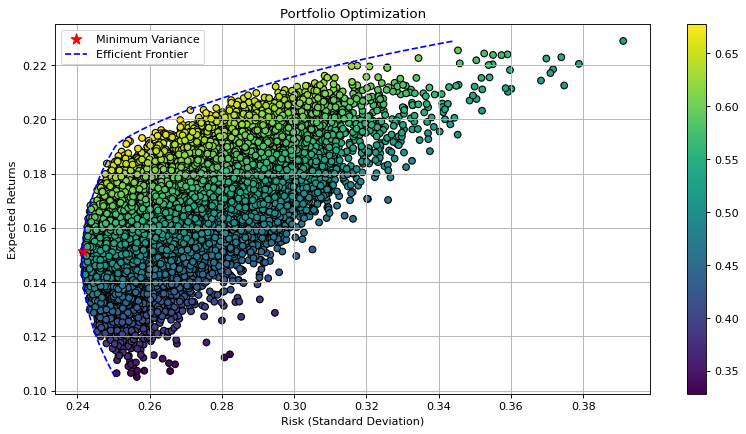

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define a function to calculate portfolio risk
def portfolio_risk(weights, returns, cov_matrix):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_std_dev

# Efficient Frontier calculation
target_returns = np.linspace(min(port_ret), max(port_ret), 100)  # Define target returns

efficient_frontier_risks = []
efficient_frontier_returns = []

for target_return in target_returns:
    # Define the optimization problem to minimize portfolio risk for a given target return
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                   {'type': 'eq', 'fun': lambda weights: np.dot(weights, annual_ret) - target_return})
    bounds = [(0, 1) for _ in range(len(stocks))]
    initial_weights = [1.0 / len(stocks) for _ in range(len(stocks))]

    result = minimize(portfolio_risk, initial_weights, args=(annual_ret, annual_cov), method='SLSQP',
                      constraints=constraints, bounds=bounds)

    # Portfolio risk for the optimized weights
    portfolio_std_dev = result.fun

    efficient_frontier_risks.append(portfolio_std_dev)
    efficient_frontier_returns.append(target_return)

# Scatter plot
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(portfolio['Risk'], portfolio['Returns'], marker='o', edgecolors="black", c=portfolio['Sharpe Ratio'])
plt.ylabel('Expected Returns')
plt.title('Portfolio Optimization', fontsize=12)
plt.colorbar()
plt.grid(True)

# Minimum-variance
min_var_idx = np.argmin(portfolio['Risk'])  # minimum variance
plt.scatter(portfolio['Risk'][min_var_idx], portfolio['Returns'][min_var_idx], c='r', marker='*', s=100, label='Minimum Variance')

# Plot the Efficient Frontier
plt.plot(efficient_frontier_risks, efficient_frontier_returns, linestyle='--', color='blue', label='Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.legend()

plt.show()


d. Find the point with the largest sharp ratio and draw the CAL. The risk-free rate is assumed to be 2%. 

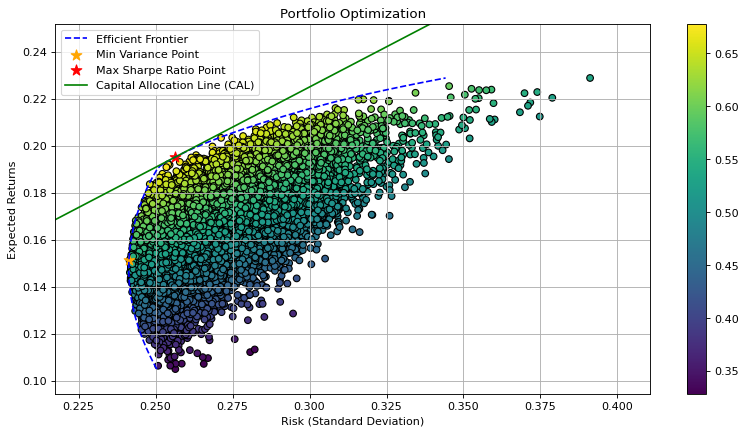

In [118]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define a function to calculate portfolio risk and Sharpe ratio
def portfolio_performance(weights, returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return portfolio_std_dev, sharpe_ratio

# Efficient Frontier calculation
target_returns = np.linspace(min(port_ret), max(port_ret), 100)  # Define target returns

efficient_frontier_risks = []
efficient_frontier_returns = []
efficient_frontier_sharpe_ratios = []

for target_return in target_returns:
    # Define the optimization problem to minimize portfolio risk for a given target return
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                   {'type': 'eq', 'fun': lambda weights: np.dot(weights, annual_ret) - target_return})
    bounds = [(0, 1) for _ in range(len(stocks))]
    initial_guess = [1.0 / len(stocks) for _ in range(len(stocks))]

    result = minimize(lambda weights: -portfolio_performance(weights, annual_ret, annual_cov, risk_free_rate)[1],
                      initial_guess, method='SLSQP', constraints=constraints, bounds=bounds)

    # Portfolio risk, return, and Sharpe ratio for the optimized weights
    portfolio_std_dev, sharpe_ratio = portfolio_performance(result.x, annual_ret, annual_cov, risk_free_rate)

    efficient_frontier_risks.append(portfolio_std_dev)
    efficient_frontier_returns.append(target_return)
    efficient_frontier_sharpe_ratios.append(sharpe_ratio)

# Find the point with the largest Sharpe ratio
max_sharpe_idx = np.argmax(efficient_frontier_sharpe_ratios)
max_sharpe_return = efficient_frontier_returns[max_sharpe_idx]
max_sharpe_risk = efficient_frontier_risks[max_sharpe_idx]
max_sharpe_ratio = efficient_frontier_sharpe_ratios[max_sharpe_idx]

# Scatter plot
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(portfolio['Risk'], portfolio['Returns'], marker='o', edgecolors="black", c=portfolio['Sharpe Ratio'])
plt.ylabel('Expected Returns')
plt.title('Portfolio Optimization', fontsize=12)
plt.colorbar()
plt.grid(True)

# Efficient Frontier line
plt.plot(efficient_frontier_risks, efficient_frontier_returns, linestyle='--', color='blue', label='Efficient Frontier')

# Mark the point with the smallest variance
plt.scatter(portfolio['Risk'][min_var_idx], portfolio['Returns'][min_var_idx], c='orange', marker='*', s=100, label='Min Variance Point')

# Mark the point with the largest Sharpe ratio
plt.scatter(max_sharpe_risk, max_sharpe_return, c='r', marker='*', s=100, label='Max Sharpe Ratio Point')

# Plot the Capital Allocation Line (CAL)
x = np.linspace(0, max(port_risk), 100)
y = risk_free_rate + max_sharpe_ratio * x
plt.plot(x, y, color='green', linestyle='-', label='Capital Allocation Line (CAL)')

plt.xlabel('Risk')
plt.legend()
plt.xlim(min(port_risk) * 0.9, )
plt.ylim(min(port_ret) * 0.9, max(port_ret) * 1.1)

plt.show()
